In [ ]:
!pip install dash
!pip install dash==1.19.0  
!pip install jupyter_dash 
!pip install --upgrade plotly
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import plotly.express as px
import plotly.graph_objects as go
# Read the airline data into pandas dataframe
spacex_df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv ")
spacex_df.head()

max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = JupyterDash(__name__)
# Create an app layout
app.layout = html.Div(
  children=[html.H1('SpaceX Launch Records Dashboard',
               style={'textAlign': 'center', 'color': '#503D36','font-size': 40}),
              # TASK 1: Add a dropdown list to enable Launch Site selection
              # The default select value is for ALL sites
                
                dcc.Dropdown(id='site-dropdown',
                    options=[{'label':'All Sites', 'value':'ALL'},
                    {'label':'CCAFS LC-40','value':'CCAFS LC-40'},{'label':'CCAFS SLC-40','value':'CCAFS SLC-40'},
                    {'label':'KSC LC-39A','value':'KSC LC-39A'},{'label':'VAFB SLC-4E','value':'VAFB SLC-4E'}],
                            placeholder="Select a Launch Site",
                             searchable=True ),
                    
                html.Br(),
                 html.Div(dcc.Graph(id='pie')),
                 html.P("Payload range (Kg):"),
                dcc.RangeSlider(id='payload-slider', min=0, max=10000, step=1000,marks={0:'0',1000:'2000', 4000:'4000',
                 6000:'6000', 8000:'8000', 10000:'10000'},
                value=[min_payload, max_payload]),
                html.Div(dcc.Graph(id='success-payload-scatter-chart')),

  ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `pie' as output
# Function decorator to specify function input and output
@app.callback(
  Output(component_id='pie', component_property='figure'),
  [Input(component_id='site-dropdown', component_property='value')]
)            
def get_pie_chart(entered_site):

  if entered_site == 'ALL':
    fig = px.pie(spacex_df, values='class', names='Launch Site',title='Success for all Sites')
    return fig
  else:
      # return the outcomes piechart for a selected site
    filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
    filtered_df1=filtered_df.groupby(['Launch Site','class']).size().reset_index(name='class count')
    fig = px.pie(filtered_df1,values='class count', names='class',title="Total Success Launches for site "+str(entered_site))
    return fig

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart',component_property='figure'),
            [Input(component_id='site-dropdown',component_property='value'),
            Input(component_id='payload-slider',component_property="value")]
)
def get_scatter_chart(entered_site, range):
    low=range[0]
    high=range[1]
    filtered_df = spacex_df[spacex_df['Payload Mass (kg)'].between(low,high)]
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)',y='class',color='Booster Version Category',
        title='Correlation Payload and Success')
        return fig
    else:
# return the outcomes piechart for a selected site
        filtered_df1=filtered_df[filtered_df['Launch Site']==entered_site]
        fig = px.scatter(filtered_df1, x='Payload Mass (kg)', y='class',color='Booster Version Category',
        title='Correlation Payload and Success '+str(entered_site))
        return fig
# Run the app
if __name__ == '__main__':
  app.run_server(mode='jupyterlab', port = 8090 ,dev_tools_ui=True, debug=True,
              dev_tools_hot_reload =True, threaded=True)
  
# Run the app
if __name__ == '__main__':
  app.run_server(mode='jupyterlab', port = 8090 ,dev_tools_ui=True, debug=True,
              dev_tools_hot_reload =True, threaded=True)



Dash Output
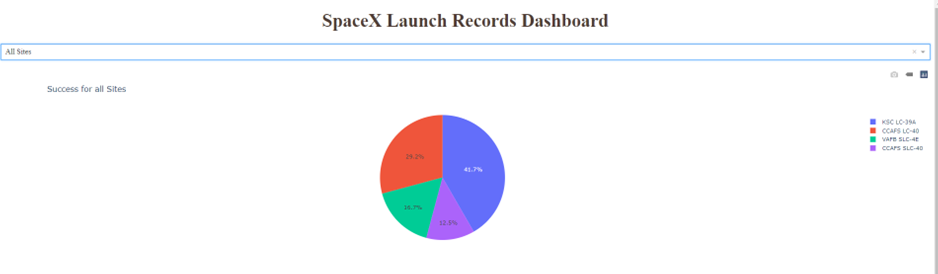

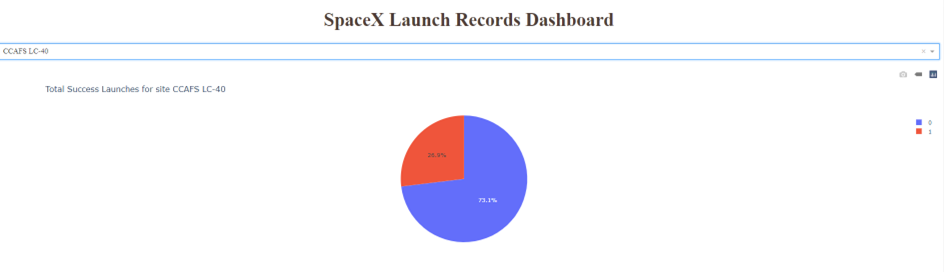

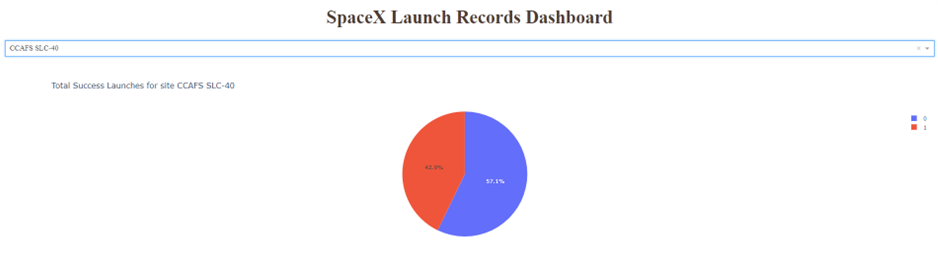

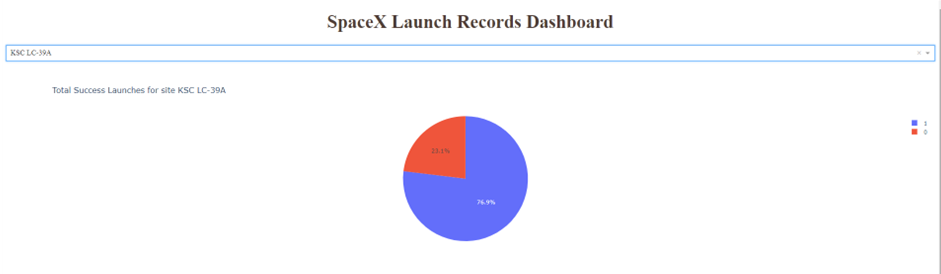

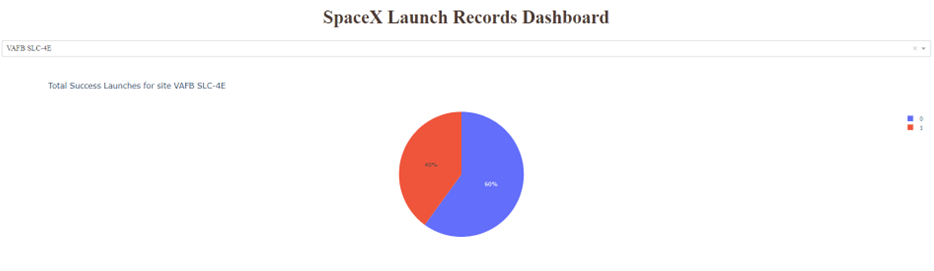

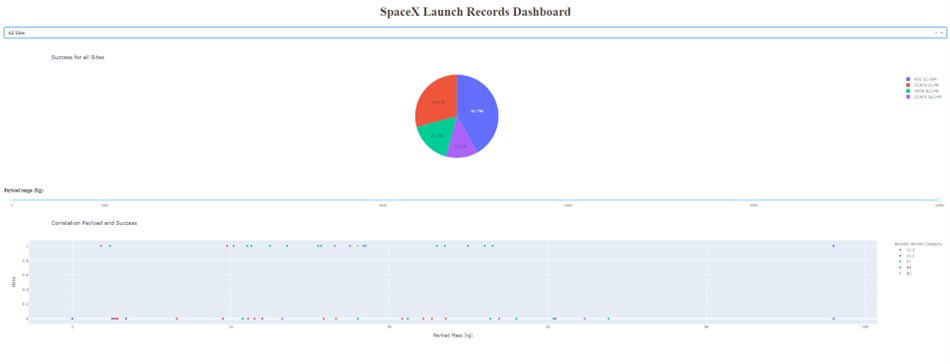

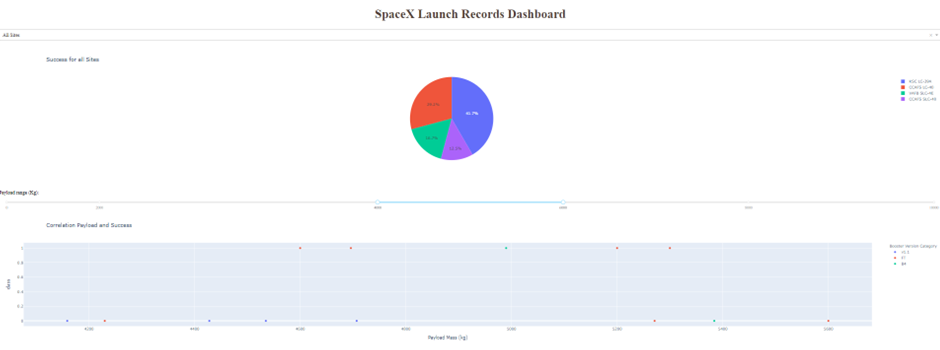

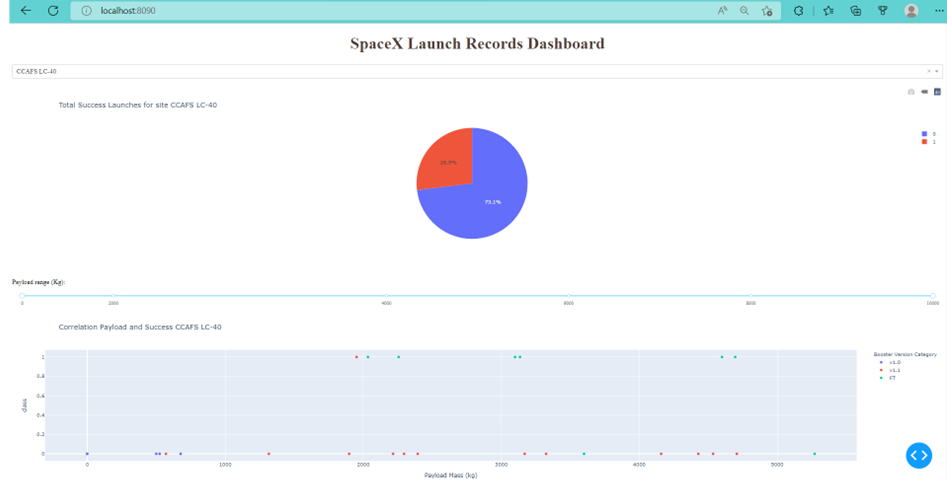

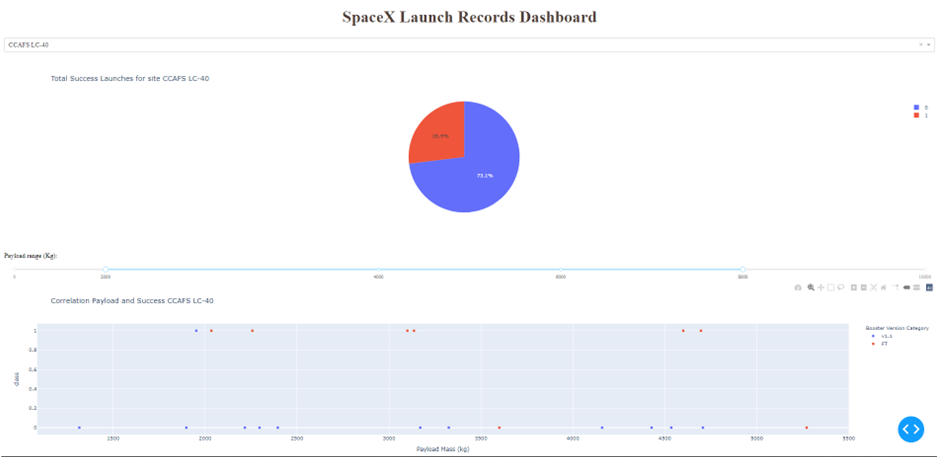

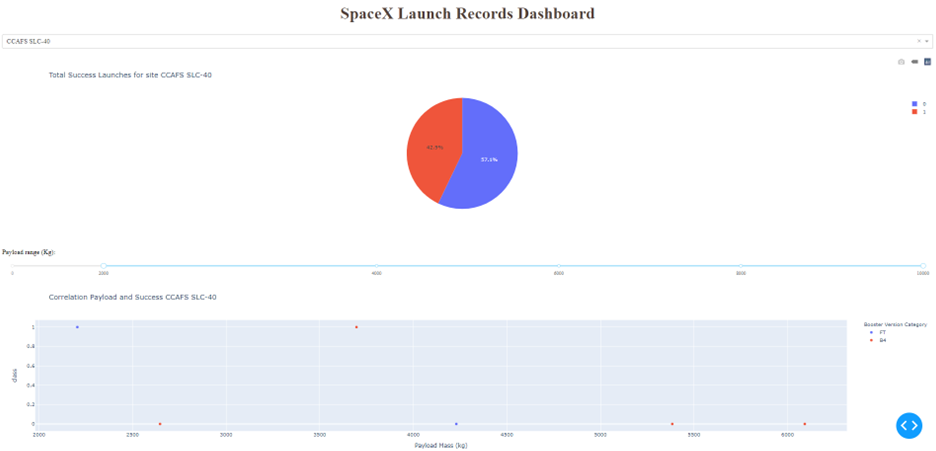

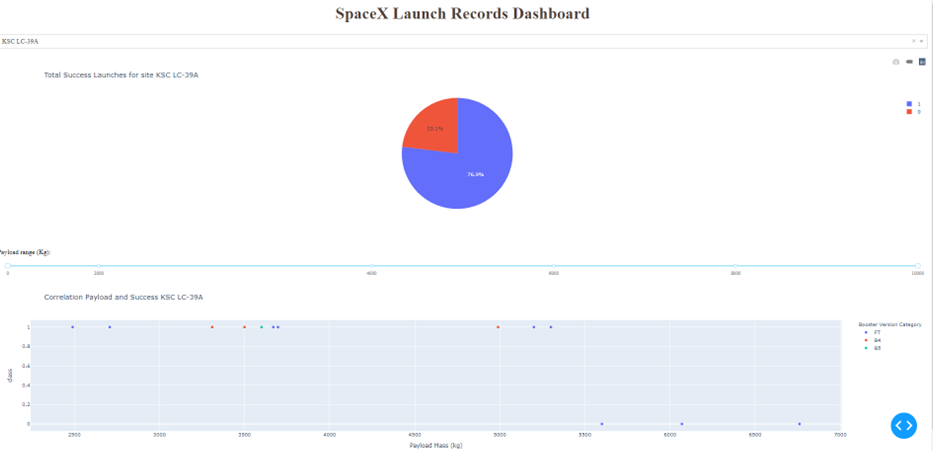

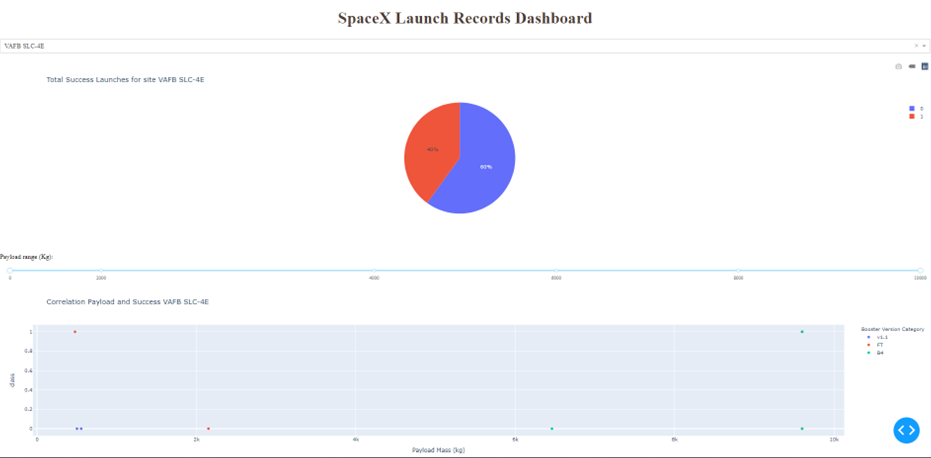